In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data
pd = pd.read_csv('athlete_events.csv')

In [4]:
# Clean the data
columns_to_be_cleaned = ['Age', 'Team']
pd = pd.dropna(axis=0, subset=columns_to_be_cleaned)

In [5]:
# Load utility variables
min_age = pd['Age'].min()
max_age = pd['Age'].max()
age_groups = [(0, 18),(18, 24),(25, 34),(35, 44),(45, 54),(55, 64),(65, 100)]

# Create the age groups
pd['Age Group'] = pd['Age'].apply(lambda x: 'Under 18' if x < 18 else '18-24' if x < 24 else '25-34' if x < 34 else '35-44' if x < 44 else '45-54' if x < 54 else '55-64' if x < 64 else '65 and over')
age_group_counts = pd['Age Group'].value_counts()

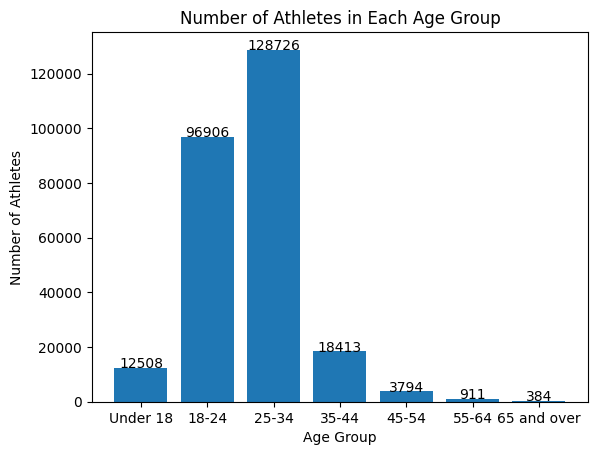

In [6]:
# Show the number of athletes in each age group
fig, ax = plt.subplots()
age_group_counts = age_group_counts.reindex(['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and over'])
ax.bar(age_group_counts.index, age_group_counts.values)
ax.set_title('Number of Athletes in Each Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Athletes')
for i, v in enumerate(age_group_counts.values):
    ax.text(i, v + 10, str(v), ha='center')
  

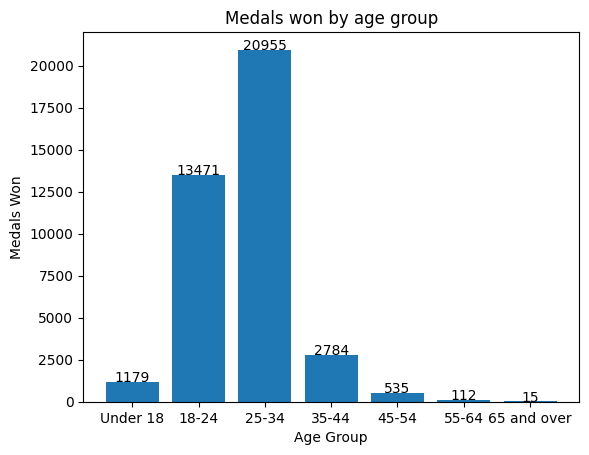

In [7]:
# Show the amount of medals won by each age group
medals_won = pd.dropna(axis=0, subset=['Medal'])
medals_won = medals_won['Age Group'].value_counts()
medals_won = medals_won.reindex(['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and over'])

fig, ax = plt.subplots()
ax.set_title('Medals won by age group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Medals Won')
ax.bar(medals_won.index, medals_won.values)
for i, v in enumerate(medals_won.values):
    ax.text(i, v + 10, str(v), ha='center')


<BarContainer object of 7 artists>

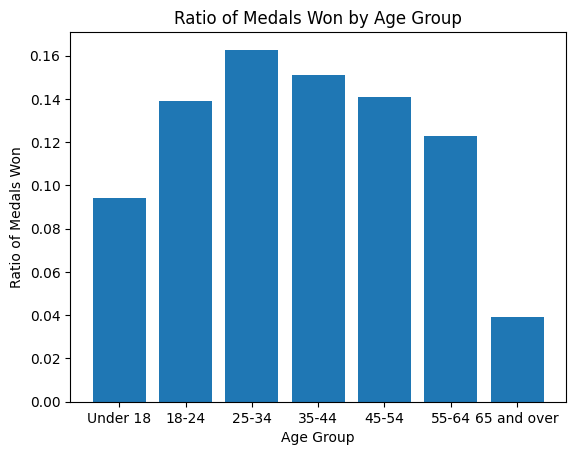

In [8]:
# Get the ratio of medals won by each age group
medals_won_ratio = medals_won / age_group_counts
fig, ax = plt.subplots()
ax.set_title('Ratio of Medals Won by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Ratio of Medals Won')
ax.bar(medals_won_ratio.index, medals_won_ratio.values)

<BarContainer object of 7 artists>

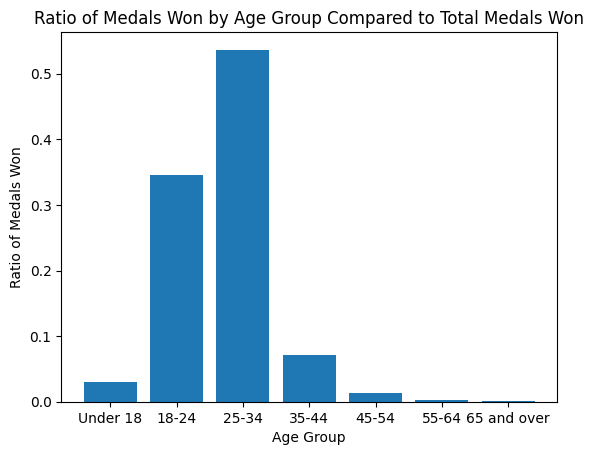

In [9]:
# Show the ratio of medals won by each age group compared to the total number of medals won
total_medals_won = medals_won.sum()
medals_won_ratio = medals_won / total_medals_won
fig, ax = plt.subplots()
ax.set_title('Ratio of Medals Won by Age Group Compared to Total Medals Won')
ax.set_xlabel('Age Group')
ax.set_ylabel('Ratio of Medals Won')
ax.bar(medals_won_ratio.index, medals_won_ratio.values)